In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
# normalization
from sklearn.preprocessing import MinMaxScaler
# standardization
from sklearn.preprocessing import StandardScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
# SVM with linear function
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Algorithm DecisionTree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLcourse/hw_final/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['ChestPainType']].value_counts(sort=True))
print('+-----------------------+')
print(df[['FastingBS']].value_counts(sort=True))
print('+-----------------------+')
print(df[['RestingECG']].value_counts(sort=True))
print('+-----------------------+')
print(df[['ExerciseAngina']].value_counts(sort=True))
print('+-----------------------+')
print(df[['ST_Slope']].value_counts(sort=True))
print('+-----------------------+')
print(df[['HeartDisease']].value_counts(sort=True))
print('+-----------------------+')

Sex
M      725
F      193
dtype: int64
+-----------------------+
ChestPainType
ASY              496
NAP              203
ATA              173
TA                46
dtype: int64
+-----------------------+
FastingBS
0            704
1            214
dtype: int64
+-----------------------+
RestingECG
Normal        552
LVH           188
ST            178
dtype: int64
+-----------------------+
ExerciseAngina
N                 547
Y                 371
dtype: int64
+-----------------------+
ST_Slope
Flat        460
Up          395
Down         63
dtype: int64
+-----------------------+
HeartDisease
1               508
0               410
dtype: int64
+-----------------------+


In [ ]:
df[['FastingBS']]=df[['FastingBS']].astype(str)
df[['HeartDisease']]=df[['HeartDisease']].astype(str)
df.info()

#dummied_new_df.to_csv('/Users/chenbaiguang/Desktop/A.csv',index=False, header=True)
#df.to_csv('Heart_outli.csv',index=False, header=True) #index(索引) header(標題)
#print('Export complete...')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [ ]:
df.describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


# Outlier Check

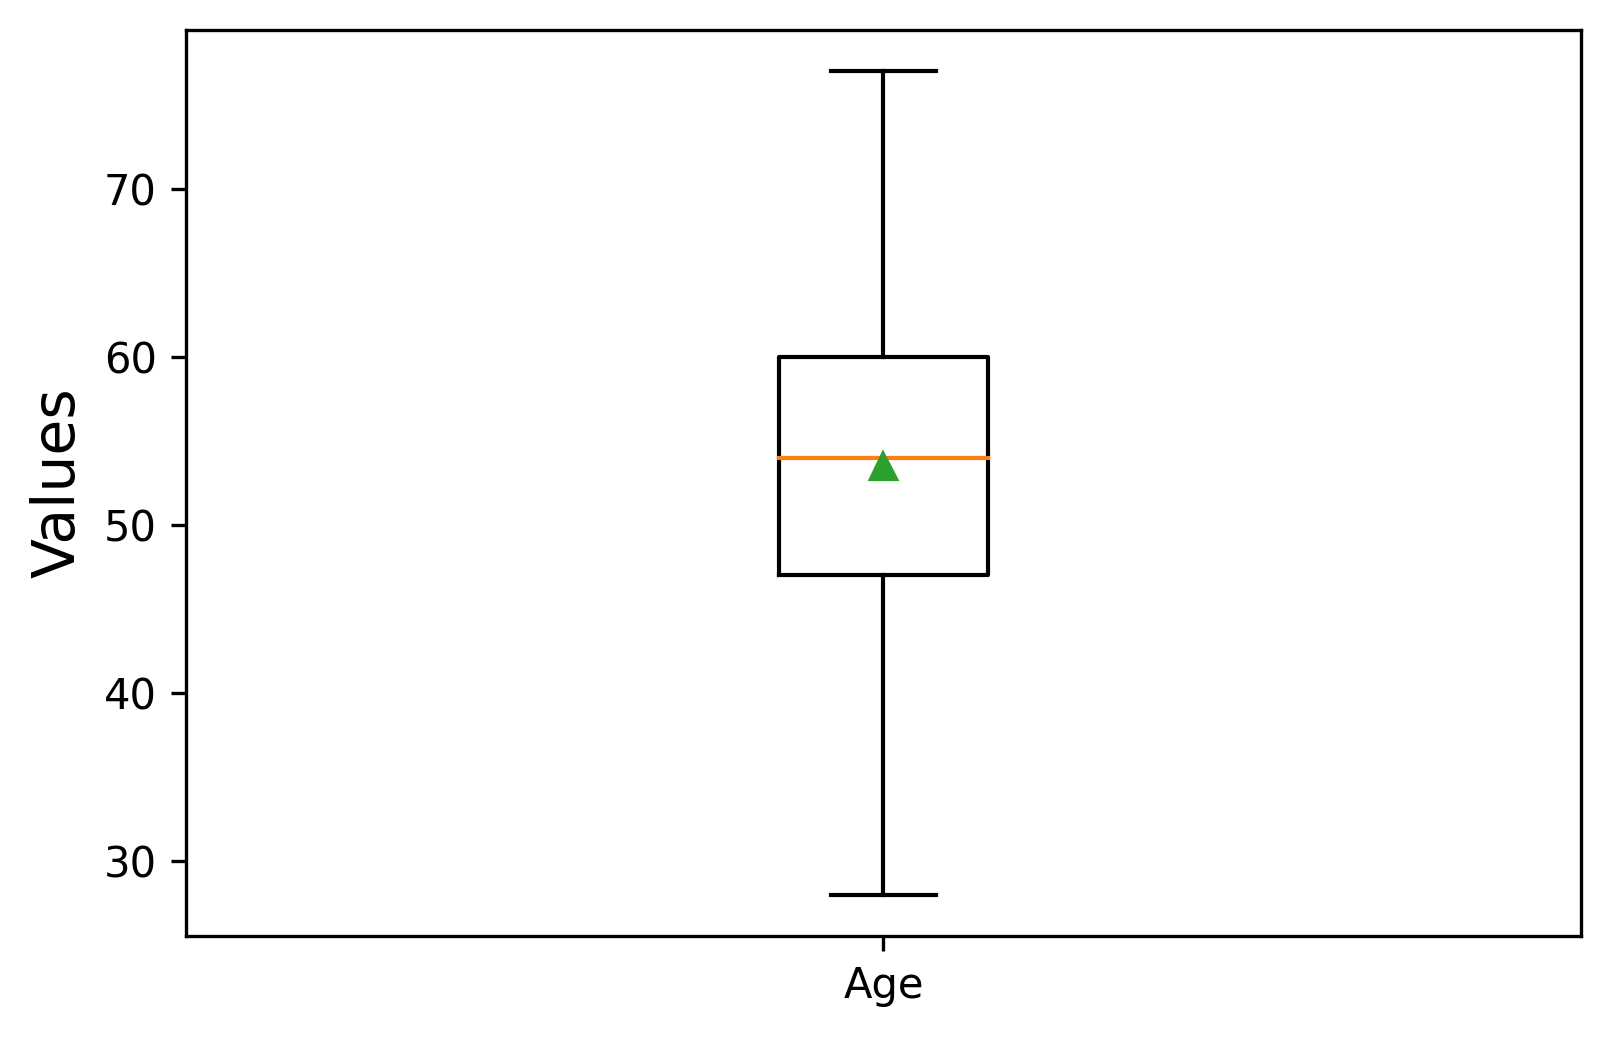

In [ ]:
plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(df['Age'],showmeans=True)
plt.xticks([1], ['Age'])
plt.show()

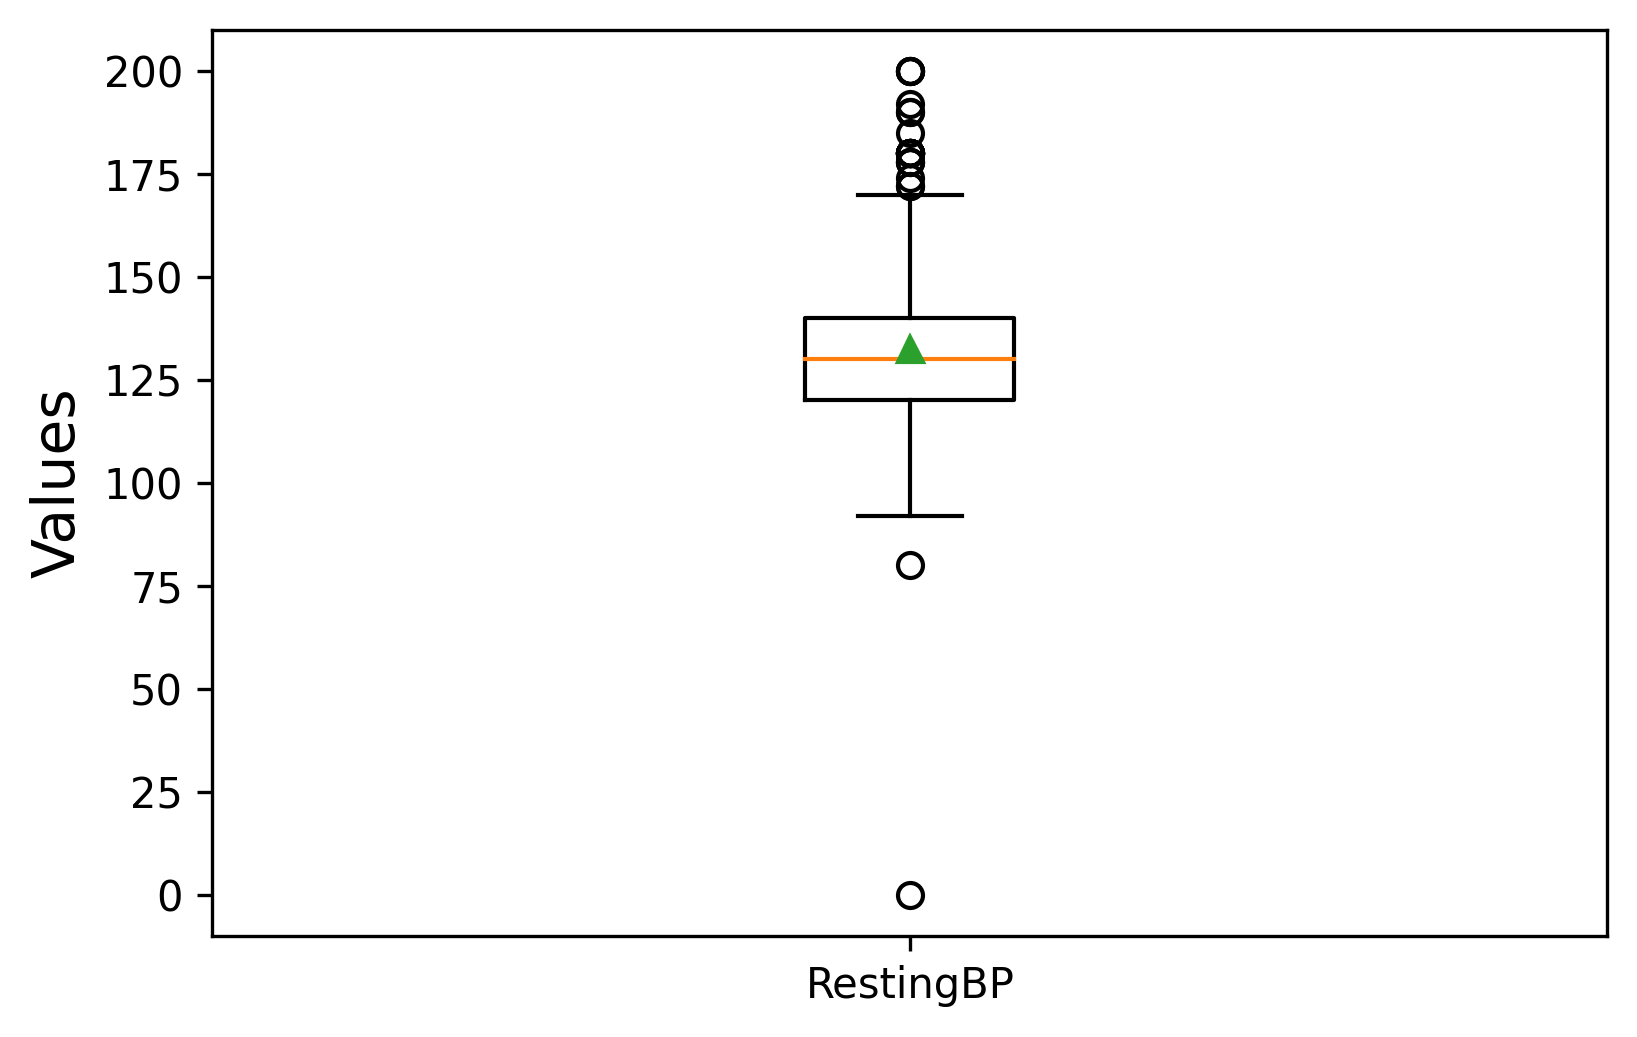

In [ ]:
#RestingBP
plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(df['RestingBP'],showmeans=True)
plt.xticks([1], ['RestingBP'])
plt.show()

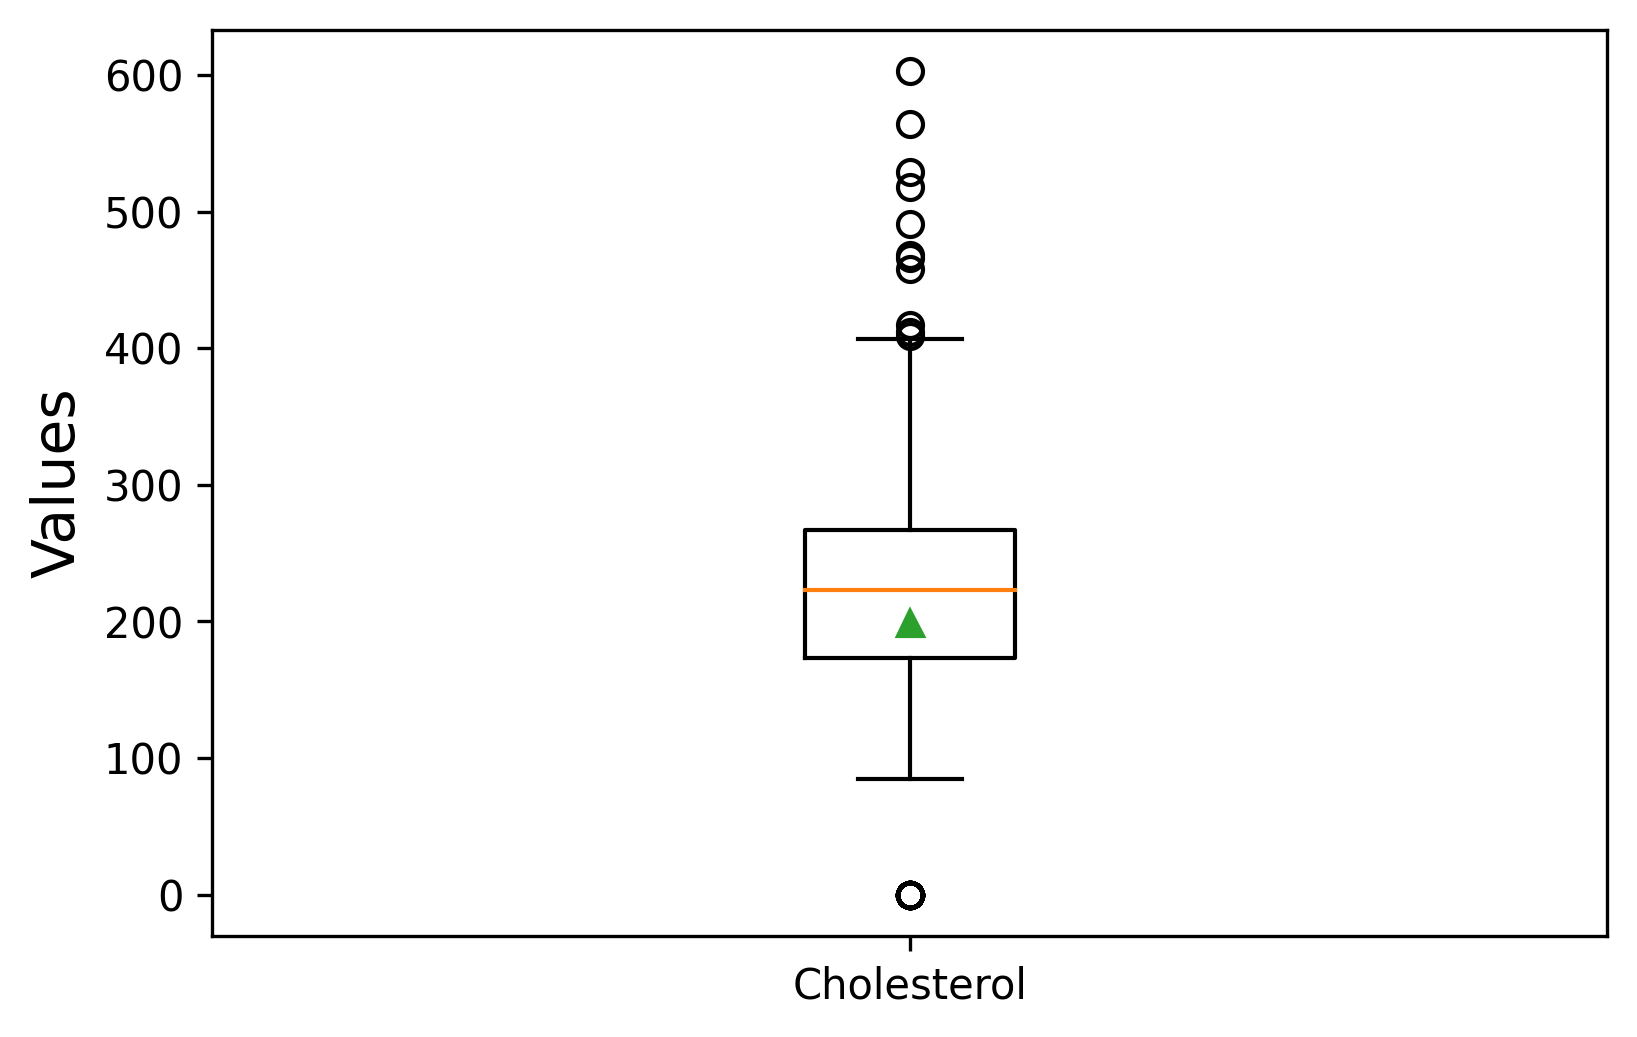

In [ ]:
#Cholesterol

plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(df['Cholesterol'],showmeans=True)
plt.xticks([1], ['Cholesterol'])
plt.show()

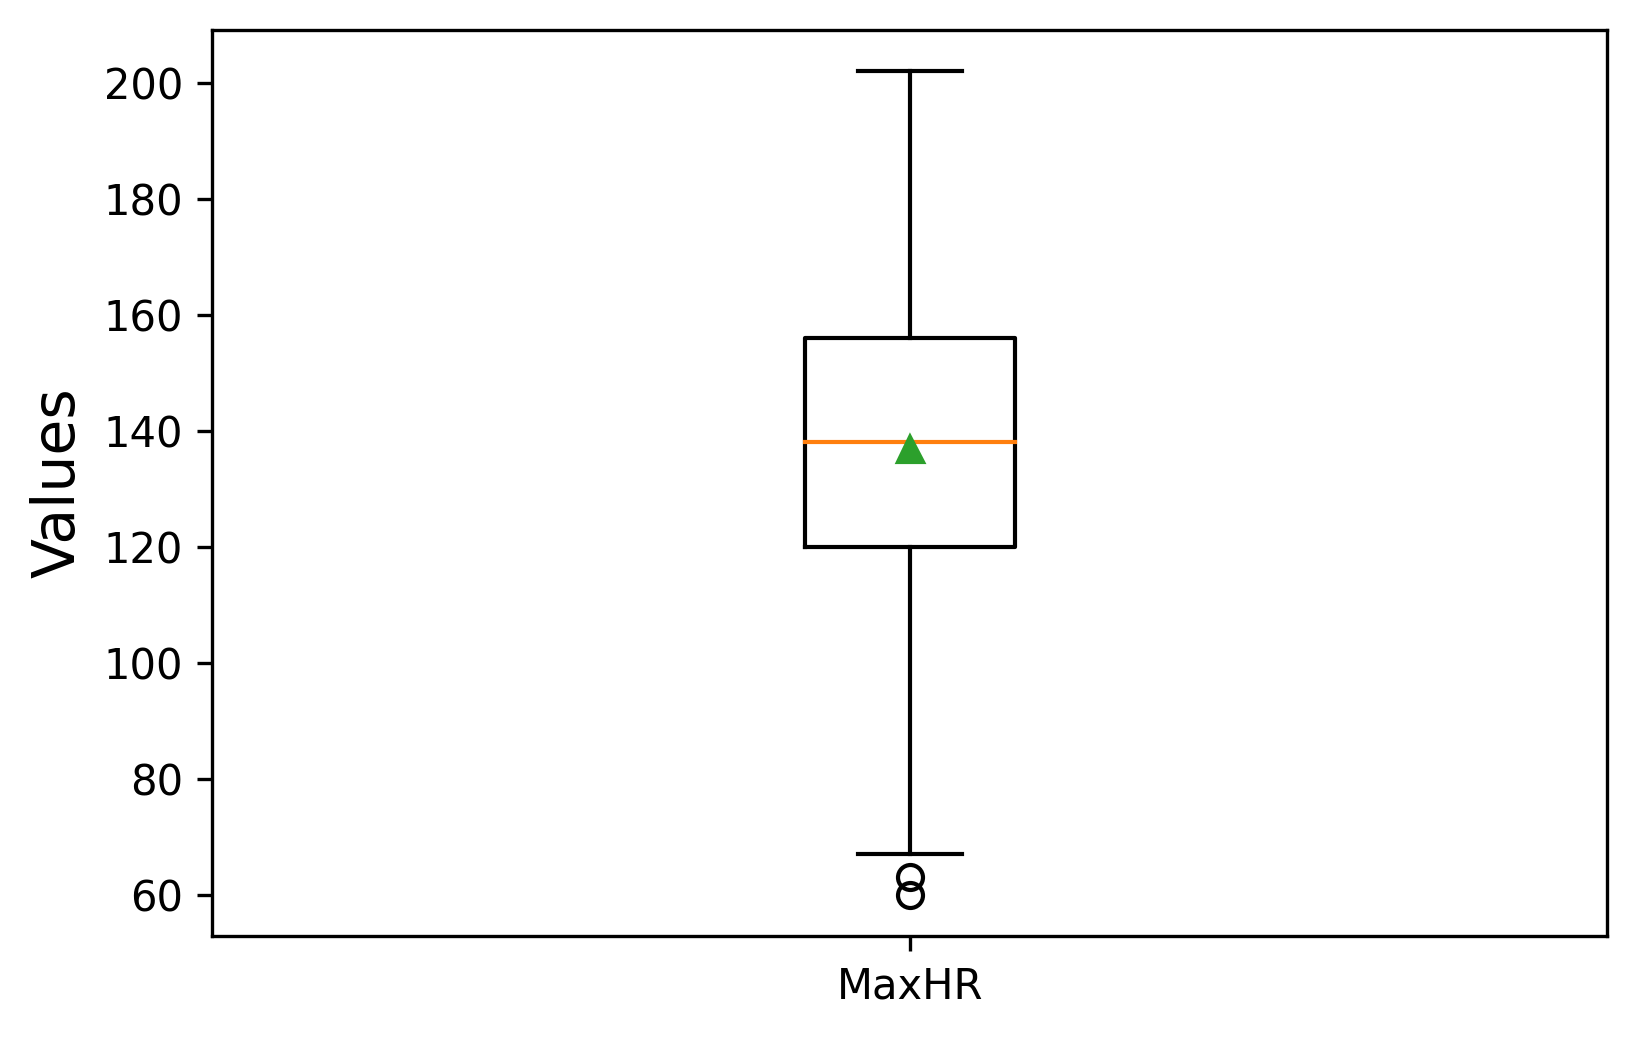

In [ ]:
#MaxHR

plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(df['MaxHR'],showmeans=True)
plt.xticks([1], ['MaxHR'])
plt.show()

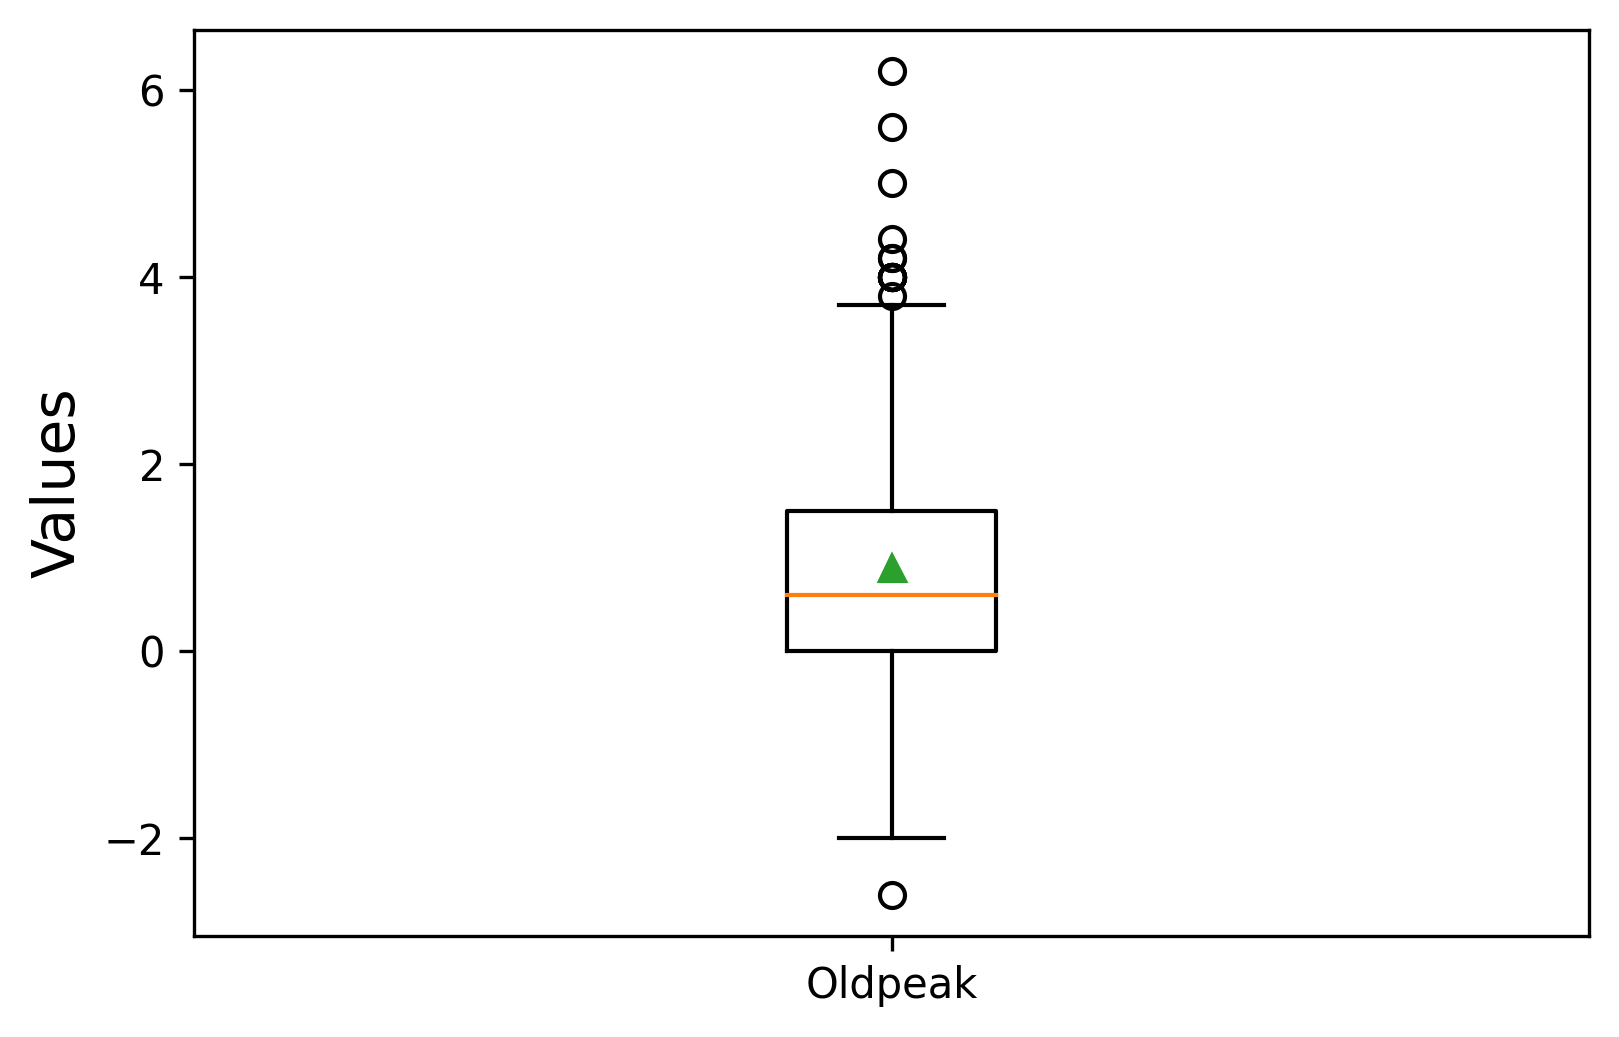

In [ ]:
#Oldpeak

plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(df['Oldpeak'],showmeans=True)
plt.xticks([1], ['Oldpeak'])
plt.show()

In [ ]:
print ("Shape Of The Before Ouliers: ",df['RestingBP'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['RestingBP'],75) - np.percentile(df['RestingBP'],25)
# outlier = Q3 + n*IQR
transform_data=df[df['RestingBP'] < np.percentile(df['RestingBP'],75)+n*IQR]
# outlier = Q1 - n*IQR
transform_data=transform_data[transform_data['RestingBP'] > np.percentile(transform_data['RestingBP'],25)-n*IQR]['RestingBP']
print ("Shape Of The After Ouliers: ",transform_data.shape)

Shape Of The Before Ouliers:  (918,)
Shape Of The After Ouliers:  (876,)


In [ ]:
print ("Shape Of The Before Ouliers: ",df['Cholesterol'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['Cholesterol'],75) - np.percentile(df['Cholesterol'],25)
# outlier = Q3 + n*IQR
transform_data=df[df['Cholesterol'] < np.percentile(df['Cholesterol'],75)+n*IQR]
# outlier = Q1 - n*IQR
transform_data=transform_data[transform_data['Cholesterol'] > np.percentile(transform_data['Cholesterol'],25)-n*IQR]['Cholesterol']
print ("Shape Of The After Ouliers: ",transform_data.shape)

Shape Of The Before Ouliers:  (918,)
Shape Of The After Ouliers:  (735,)


In [ ]:
print ("Shape Of The Before Ouliers: ",df['MaxHR'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['MaxHR'],75) - np.percentile(df['MaxHR'],25)
# outlier = Q3 + n*IQR
transform_data=df[df['MaxHR'] < np.percentile(df['MaxHR'],75)+n*IQR]
# outlier = Q1 - n*IQR
transform_data=transform_data[transform_data['MaxHR'] > np.percentile(transform_data['MaxHR'],25)-n*IQR]['MaxHR']
print ("Shape Of The After Ouliers: ",transform_data.shape)

Shape Of The Before Ouliers:  (918,)
Shape Of The After Ouliers:  (916,)


In [ ]:
print ("Shape Of The Before Ouliers: ",df['Oldpeak'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['Oldpeak'],75) - np.percentile(df['Oldpeak'],25)
# outlier = Q3 + n*IQR
transform_data=df[df['Oldpeak'] < np.percentile(df['Oldpeak'],75)+n*IQR]
# outlier = Q1 - n*IQR
transform_data=transform_data[transform_data['Oldpeak'] > np.percentile(transform_data['Oldpeak'],25)-n*IQR]['Oldpeak']
print ("Shape Of The After Ouliers: ",transform_data.shape)

Shape Of The Before Ouliers:  (918,)
Shape Of The After Ouliers:  (902,)


In [ ]:
transform_data.describe()

count    876.000000
mean     130.492009
std       15.176634
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: RestingBP, dtype: float64

# Dummies

In [ ]:
new_df=df.dropna(axis=0, how='any')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.2+ KB


In [ ]:
dummied_new_df=pd.get_dummies(new_df,columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'])
dummied_new_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,40,140,289,172,0.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,49,160,180,156,1.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
2,37,130,283,98,0.0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,1,0
3,48,138,214,108,1.5,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4,54,150,195,122,0.0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
914,68,144,193,141,3.4,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
915,57,130,131,115,1.2,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
916,57,130,236,174,0.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [ ]:
#dummied_new_df.to_csv('/Users/chenbaiguang/Desktop/A.csv',index=False, header=True)
dummied_new_df.to_csv('Heart_NA.csv',index=False, header=True) #index(索引) header(標題)
print('Export complete...')

Export complete...


# Model Building

In [ ]:
hw = pd.read_csv('/content/drive/MyDrive/MLcourse/hw_final/Heart_NA.csv')

hw

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,40,140,289,172,0.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,49,160,180,156,1.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
2,37,130,283,98,0.0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,1,0
3,48,138,214,108,1.5,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4,54,150,195,122,0.0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
914,68,144,193,141,3.4,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
915,57,130,131,115,1.2,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
916,57,130,236,174,0.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [ ]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   MaxHR              918 non-null    int64  
 4   Oldpeak            918 non-null    float64
 5   Sex_F              918 non-null    int64  
 6   Sex_M              918 non-null    int64  
 7   ChestPainType_ASY  918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  FastingBS_0        918 non-null    int64  
 12  FastingBS_1        918 non-null    int64  
 13  RestingECG_LVH     918 non-null    int64  
 14  RestingECG_Normal  918 non-null    int64  
 15  RestingECG_ST      918 non-null    int64  
 16  ExerciseAngina_N   918 non

In [ ]:
hw.describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,...,918.0,918.00,918.00,918.00,918.00,918.00,918.0,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89,0.21,0.79,0.54,0.19,0.22,...,0.2,0.60,0.19,0.60,0.40,0.07,0.5,0.43,0.45,0.55
std,9.43,18.51,109.38,25.46,1.07,0.41,0.41,0.50,0.39,0.42,...,0.4,0.49,0.40,0.49,0.49,0.25,0.5,0.50,0.50,0.50
min,28.00,0.00,0.00,60.00,-2.60,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,47.00,120.00,173.25,120.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
50%,54.00,130.00,223.00,138.00,0.60,0.00,1.00,1.00,0.00,0.00,...,0.0,1.00,0.00,1.00,0.00,0.00,1.0,0.00,0.00,1.00
75%,60.00,140.00,267.00,156.00,1.50,0.00,1.00,1.00,0.00,0.00,...,0.0,1.00,0.00,1.00,1.00,0.00,1.0,1.00,1.00,1.00
max,77.00,200.00,603.00,202.00,6.20,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [ ]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(hw)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=hw.columns #新方法
#scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,0.24,0.70,0.48,0.79,0.30,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.43,0.80,0.30,0.68,0.41,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.18,0.65,0.47,0.27,0.30,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.41,0.69,0.35,0.34,0.47,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.53,0.75,0.32,0.44,0.30,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#model building up process

#set x (make prediction) with minimax
scaled_x=scaled_data.drop(['HeartDisease_0','HeartDisease_1'],axis=1).copy()

#set y (want to predict)
scaled_y=scaled_data['HeartDisease_1'].copy()
scaled_y=scaled_y.astype(int)

#scaled_x
scaled_y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease_1, Length: 918, dtype: int64

In [ ]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=8)

from collections import Counter
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({1: 413, 0: 321})
------------------------------------
scaled_y_test : Counter({1: 95, 0: 89})


# Logistic

In [ ]:
from sklearn import linear_model

In [ ]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(scaled_x_train, scaled_y_train)

LogisticRegression()

In [ ]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=logistic_model.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=logistic_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print("########6.2 Show result: out-of-sample testing############")
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print()

########6.2 Show result: out-of-sample testing############
Training result:
Training ACC: 87.19
Training f1s: 88.89
Training pre: 86.84
Training sen: 91.04
Training spe: 82.24

Training confusion matrix:
[[264  57]
 [ 37 376]]
+-----------------------------------------+
Testing result:
Testing ACC: 86.41
Testing f1s: 87.05
Testing pre: 85.71
Testing sen: 88.42
Testing spe: 84.27

Testing confusion matrix:
[[75 14]
 [11 84]]



# RBF

In [ ]:
model_RBF_SVM=SVC(kernel='rbf', gamma='scale', C=1.0,random_state=8)
#model_RBF_SVM=SVC(kernel='rbf', gamma=0.05, C=1, random_state=4)
model_RBF_SVM.fit(scaled_x_train,scaled_y_train)

SVC(random_state=8)

Training result
Each fold ACC: [0.87755102 0.85306122 0.8442623 ]
Average ACC: 85.83 +/- 1.41
Training result:
Training ACC: 87.74
Training f1s: 89.31
Training pre: 87.65
Training sen: 91.04
Training spe: 83.49

Training confusion matrix:
[[268  53]
 [ 37 376]]
+-----------------------------------------+
Testing result:
Testing ACC: 87.5
Testing f1s: 88.44
Testing pre: 84.62
Testing sen: 92.63
Testing spe: 82.02

Testing confusion matrix:
[[73 16]
 [ 7 88]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


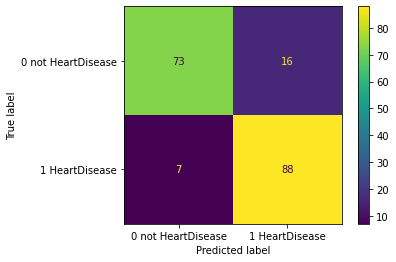

In [ ]:
CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=model_RBF_SVM.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=model_RBF_SVM.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)


# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

# Testing confusion matrix
plot_confusion_matrix(model_RBF_SVM,scaled_x_test,scaled_y_test,display_labels=["0 not HeartDisease","1 HeartDisease"])

In [ ]:
for C in [1,10,100,1000,10000]:
  for gamma in [0.05,0.25,0.5,0.75]:

    scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)
    model_RBF_SVM=SVC(kernel='rbf', gamma=gamma, C=C,random_state=4)
    model_RBF_SVM.fit(scaled_x_train,scaled_y_train)
    CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

    #print reault
    print('Training result')
    print('Each fold ACC:',CV3F_SVM_acc)
    print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))
    print('gamma:',gamma)
    print('C:',C)
    print('_________')

Training result
Each fold ACC: [0.86938776 0.86530612 0.85245902]
Average ACC: 86.24 +/- 0.72
gamma: 0.05
C: 1
_________
Training result
Each fold ACC: [0.86530612 0.85306122 0.86065574]
Average ACC: 85.97 +/- 0.5
gamma: 0.25
C: 1
_________
Training result
Each fold ACC: [0.85714286 0.84489796 0.85655738]
Average ACC: 85.29 +/- 0.56
gamma: 0.5
C: 1
_________
Training result
Each fold ACC: [0.85306122 0.83265306 0.85245902]
Average ACC: 84.61 +/- 0.95
gamma: 0.75
C: 1
_________
Training result
Each fold ACC: [0.85714286 0.85306122 0.8647541 ]
Average ACC: 85.83 +/- 0.48
gamma: 0.05
C: 10
_________
Training result
Each fold ACC: [0.84081633 0.83265306 0.85245902]
Average ACC: 84.2 +/- 0.81
gamma: 0.25
C: 10
_________
Training result
Each fold ACC: [0.82857143 0.82040816 0.8442623 ]
Average ACC: 83.11 +/- 0.99
gamma: 0.5
C: 10
_________
Training result
Each fold ACC: [0.83265306 0.82040816 0.84836066]
Average ACC: 83.38 +/- 1.14
gamma: 0.75
C: 10
_________
Training result
Each fold ACC: [

In [ ]:
#gamma = 0.05 & C = 1000
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=8)
final_RBF_SVM=SVC(kernel='rbf', gamma=0.05, C=1,random_state=8)
final_RBF_SVM.fit(scaled_x_train,scaled_y_train)

SVC(C=1, gamma=0.05, random_state=8)

Testing ACC: 85.87
Testing f1s: 86.73
Testing pre: 84.16
Testing sen: 89.47
Testing spe: 82.02


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


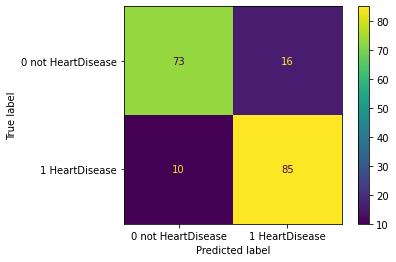

In [ ]:
final_model_testing_prediction=final_RBF_SVM.predict(scaled_x_test)
final_model_testing_acc=accuracy_score(scaled_y_test,final_model_testing_prediction)
final_model_testing_f1s=f1_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_pre=precision_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_sen=sensitivity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)
final_model_testing_spe=specificity_score(scaled_y_test,final_model_testing_prediction,pos_label=1)

#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
plot_confusion_matrix(final_RBF_SVM,scaled_x_test,scaled_y_test,display_labels=["0 not HeartDisease","1 HeartDisease"])

# Cart

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLcourse/hw_final/Heart_20221223.csv')

In [ ]:
#model building up process

#set x (make prediction) with minimax
cart_x=df.drop(['HeartDisease_0','HeartDisease_1'],axis=1).copy()

#set y (want to predict)
cart_y=df['HeartDisease_1'].copy()
cart_y=cart_y.astype(int)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(cart_x,cart_y,test_size=0.2,random_state=8)

model_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=1,random_state=8) #這邊可以手動去調整超參數的結果驗證


In [ ]:
from operator import length_hint
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(cart_x,cart_y,test_size=0.2,random_state=8) #random state = 8 (固定)

# 5.2 Manually peforming hyper parameter tuning
model_cart=DecisionTreeClassifier(criterion='gini',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,random_state=8) #這邊可以手動去調整超參數的結果驗證
model_cart.fit(x_train,y_train)

CV3F_cart_acc=cross_val_score(model_cart,x_train,y_train,cv=3,scoring='accuracy')
print('Each fold ACC:',CV3F_cart_acc)
print('Average ACC:',round((np.mean(CV3F_cart_acc))*100,2),'+/-',round((np.std(CV3F_cart_acc))*100,2))
print('Depth: ',model_cart.get_depth())
print('Leaves:',model_cart.get_n_leaves())
print('--------------------------------------')

# 4.2 Show result: out-of-sample testing
# Training result
#想要看Training的結果，不是testing的結果
training_prediction=model_cart.predict(x_train) #training_prediction是預測值
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=model_cart.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1) #pos_label：default，防呆，不然資料有可能反過來
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Each fold ACC: [0.77005348 0.84491979 0.83957219]
Average ACC: 81.82 +/- 3.41
Depth:  11
Leaves: 78
--------------------------------------
Training result:
Training ACC: 100.0
Training f1s: 100.0
Training pre: 100.0
Training sen: 100.0
Training spe: 100.0

Training confusion matrix:
[[290   0]
 [  0 271]]
+-----------------------------------------+
Testing result:
Testing ACC: 82.27
Testing f1s: 76.64
Testing pre: 77.36
Testing sen: 75.93
Testing spe: 86.21

Testing confusion matrix:
[[75 12]
 [13 41]]


In [ ]:
min_samples_leaf_value=[2,3,4] #i
max_leaf_nodes_value=[15,18,21] #j
# lst = [10, 100, 1000, 10000]
for i in min_samples_leaf_value:
  for j in max_leaf_nodes_value:
    x_train,x_test,y_train,y_test=train_test_split(cart_x,cart_y,test_size=0.2,random_state=8) #random state = 8 (固定)

    model_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=j,min_samples_leaf=i,random_state=8)

    model_cart.fit(x_train,y_train)

    # CV=3
    CV5F_cart_acc=cross_val_score(model_cart,x_train,y_train,cv=3,scoring='accuracy')
    # CV5F_cart_acc=cross_val_score(model_cart,x_train,y_train,cv=5,scoring='accuracy')


    print('Training result：','min_samples_leaf_value=',i,'max_leaf_nodes_value=',j)
    print('Each fold ACC:',CV5F_cart_acc)
    print('Average ACC:',round((np.mean(CV5F_cart_acc))*100,2),'+/-',round((np.std(CV5F_cart_acc))*100,2))
    print('Depth: ',model_cart.get_depth())
    print('Leaves:',model_cart.get_n_leaves())
    print('--------------------------------------')

Training result： min_samples_leaf_value= 2 max_leaf_nodes_value= 15
Each fold ACC: [0.80213904 0.84491979 0.8342246 ]
Average ACC: 82.71 +/- 1.82
Depth:  5
Leaves: 15
--------------------------------------
Training result： min_samples_leaf_value= 2 max_leaf_nodes_value= 18
Each fold ACC: [0.80213904 0.85026738 0.8342246 ]
Average ACC: 82.89 +/- 2.0
Depth:  5
Leaves: 18
--------------------------------------
Training result： min_samples_leaf_value= 2 max_leaf_nodes_value= 21
Each fold ACC: [0.79144385 0.8342246  0.8342246 ]
Average ACC: 82.0 +/- 2.02
Depth:  5
Leaves: 21
--------------------------------------
Training result： min_samples_leaf_value= 3 max_leaf_nodes_value= 15
Each fold ACC: [0.80213904 0.85561497 0.8342246 ]
Average ACC: 83.07 +/- 2.2
Depth:  5
Leaves: 15
--------------------------------------
Training result： min_samples_leaf_value= 3 max_leaf_nodes_value= 18
Each fold ACC: [0.80213904 0.85026738 0.8342246 ]
Average ACC: 82.89 +/- 2.0
Depth:  5
Leaves: 18
-------------

Training result:
Training ACC: 82.71
Training f1s: 82.89
Training pre: 79.39
Training sen: 86.72
Training spe: 78.97

Training confusion matrix:
[[229  61]
 [ 36 235]]
+-----------------------------------------+
Testing result:
Testing ACC: 80.14
Testing f1s: 77.05
Testing pre: 69.12
Testing sen: 87.04
Testing spe: 75.86

Testing confusion matrix:
[[66 21]
 [ 7 47]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


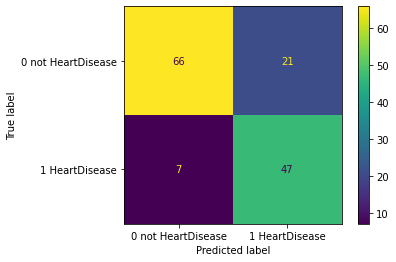

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(cart_x,cart_y,test_size=0.2,random_state=8) #random state = 8 (固定)

final_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=4,min_samples_leaf=15,random_state=8)
final_cart.fit(x_train,y_train)

training_prediction=final_cart.predict(x_train) #training_prediction是預測值
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=final_cart.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1) #pos_label：default，防呆，不然資料有可能反過來
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

plot_confusion_matrix(final_cart,x_test,y_test,display_labels=["0 not HeartDisease","1 HeartDisease"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(cart_x,cart_y,test_size=0.2,random_state=8) #random state = 8 (固定)

final1_cart=DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=4,min_samples_leaf=15,random_state=8)
final1_cart.fit(x_train,y_train)

training_prediction=final1_cart.predict(x_train) #training_prediction是預測值
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=final1_cart.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1) #pos_label：default，防呆，不然資料有可能反過來
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Training result:
Training ACC: 82.71
Training f1s: 82.89
Training pre: 79.39
Training sen: 86.72
Training spe: 78.97

Training confusion matrix:
[[229  61]
 [ 36 235]]
+-----------------------------------------+
Testing result:
Testing ACC: 80.14
Testing f1s: 77.05
Testing pre: 69.12
Testing sen: 87.04
Testing spe: 75.86

Testing confusion matrix:
[[66 21]
 [ 7 47]]
